# PIMA Indians Diabetes Databases

### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

plt.style.use('ggplot') 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.shape

(768, 9)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Checking missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Text(0.5, 1.0, 'Count of Target Variable')

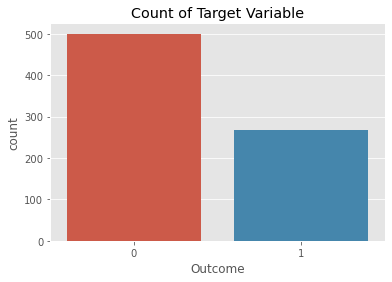

In [9]:
sns.countplot(x=data.Outcome,data=data)
plt.title('Count of Target Variable')

In [90]:
print(data['Outcome'].value_counts())

# Non-Diabetes patients = 500(65.10%) & Diabetes patients= 268(34.89%)

0    500
1    268
Name: Outcome, dtype: int64


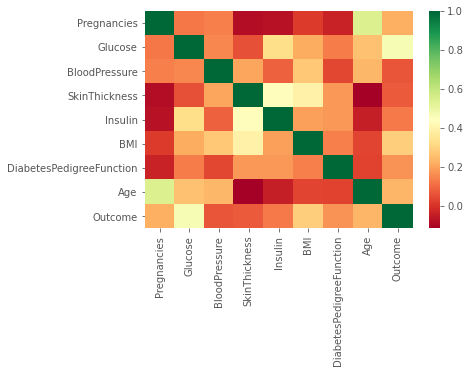

In [10]:
sns.heatmap(data.corr(),cmap="RdYlGn")

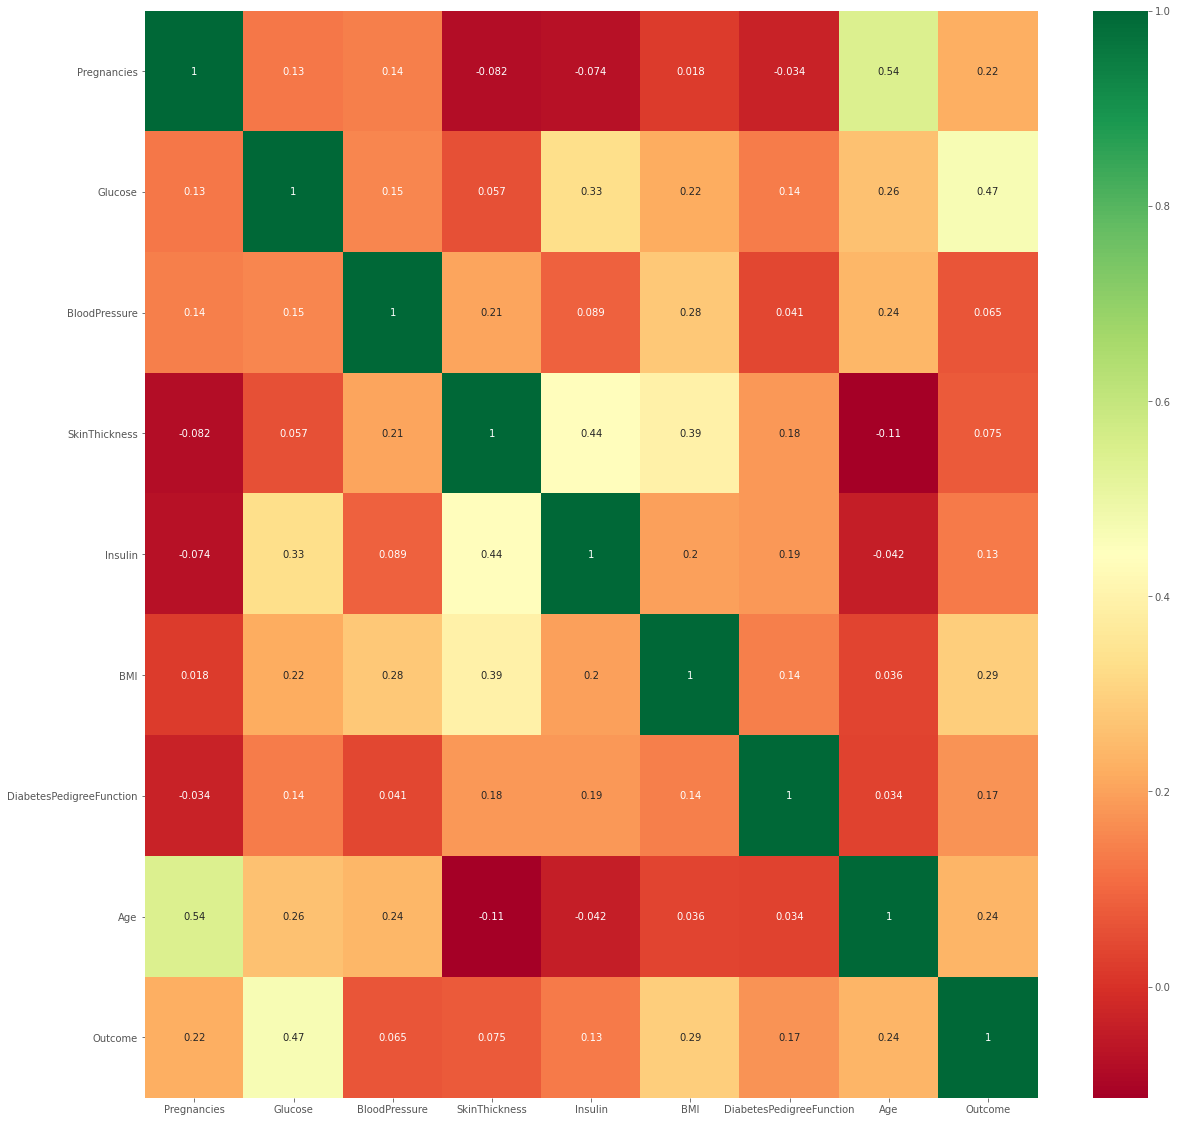

In [11]:
# Get correlations of each features in dataset

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# Plot heatmap 
g = sns.heatmap(data[top_corr_features].corr(), annot = True, cmap = "RdYlGn") # annot=True so that we can see the values

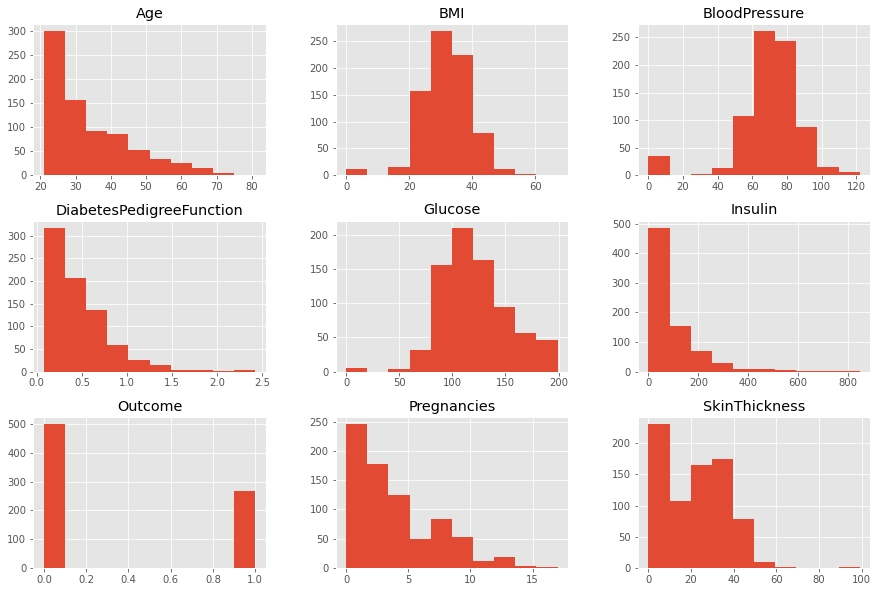

<Figure size 432x288 with 0 Axes>

In [12]:
# histograms - Checking the distribution of each feature

data.hist(figsize=(15,10))
plt.figure();

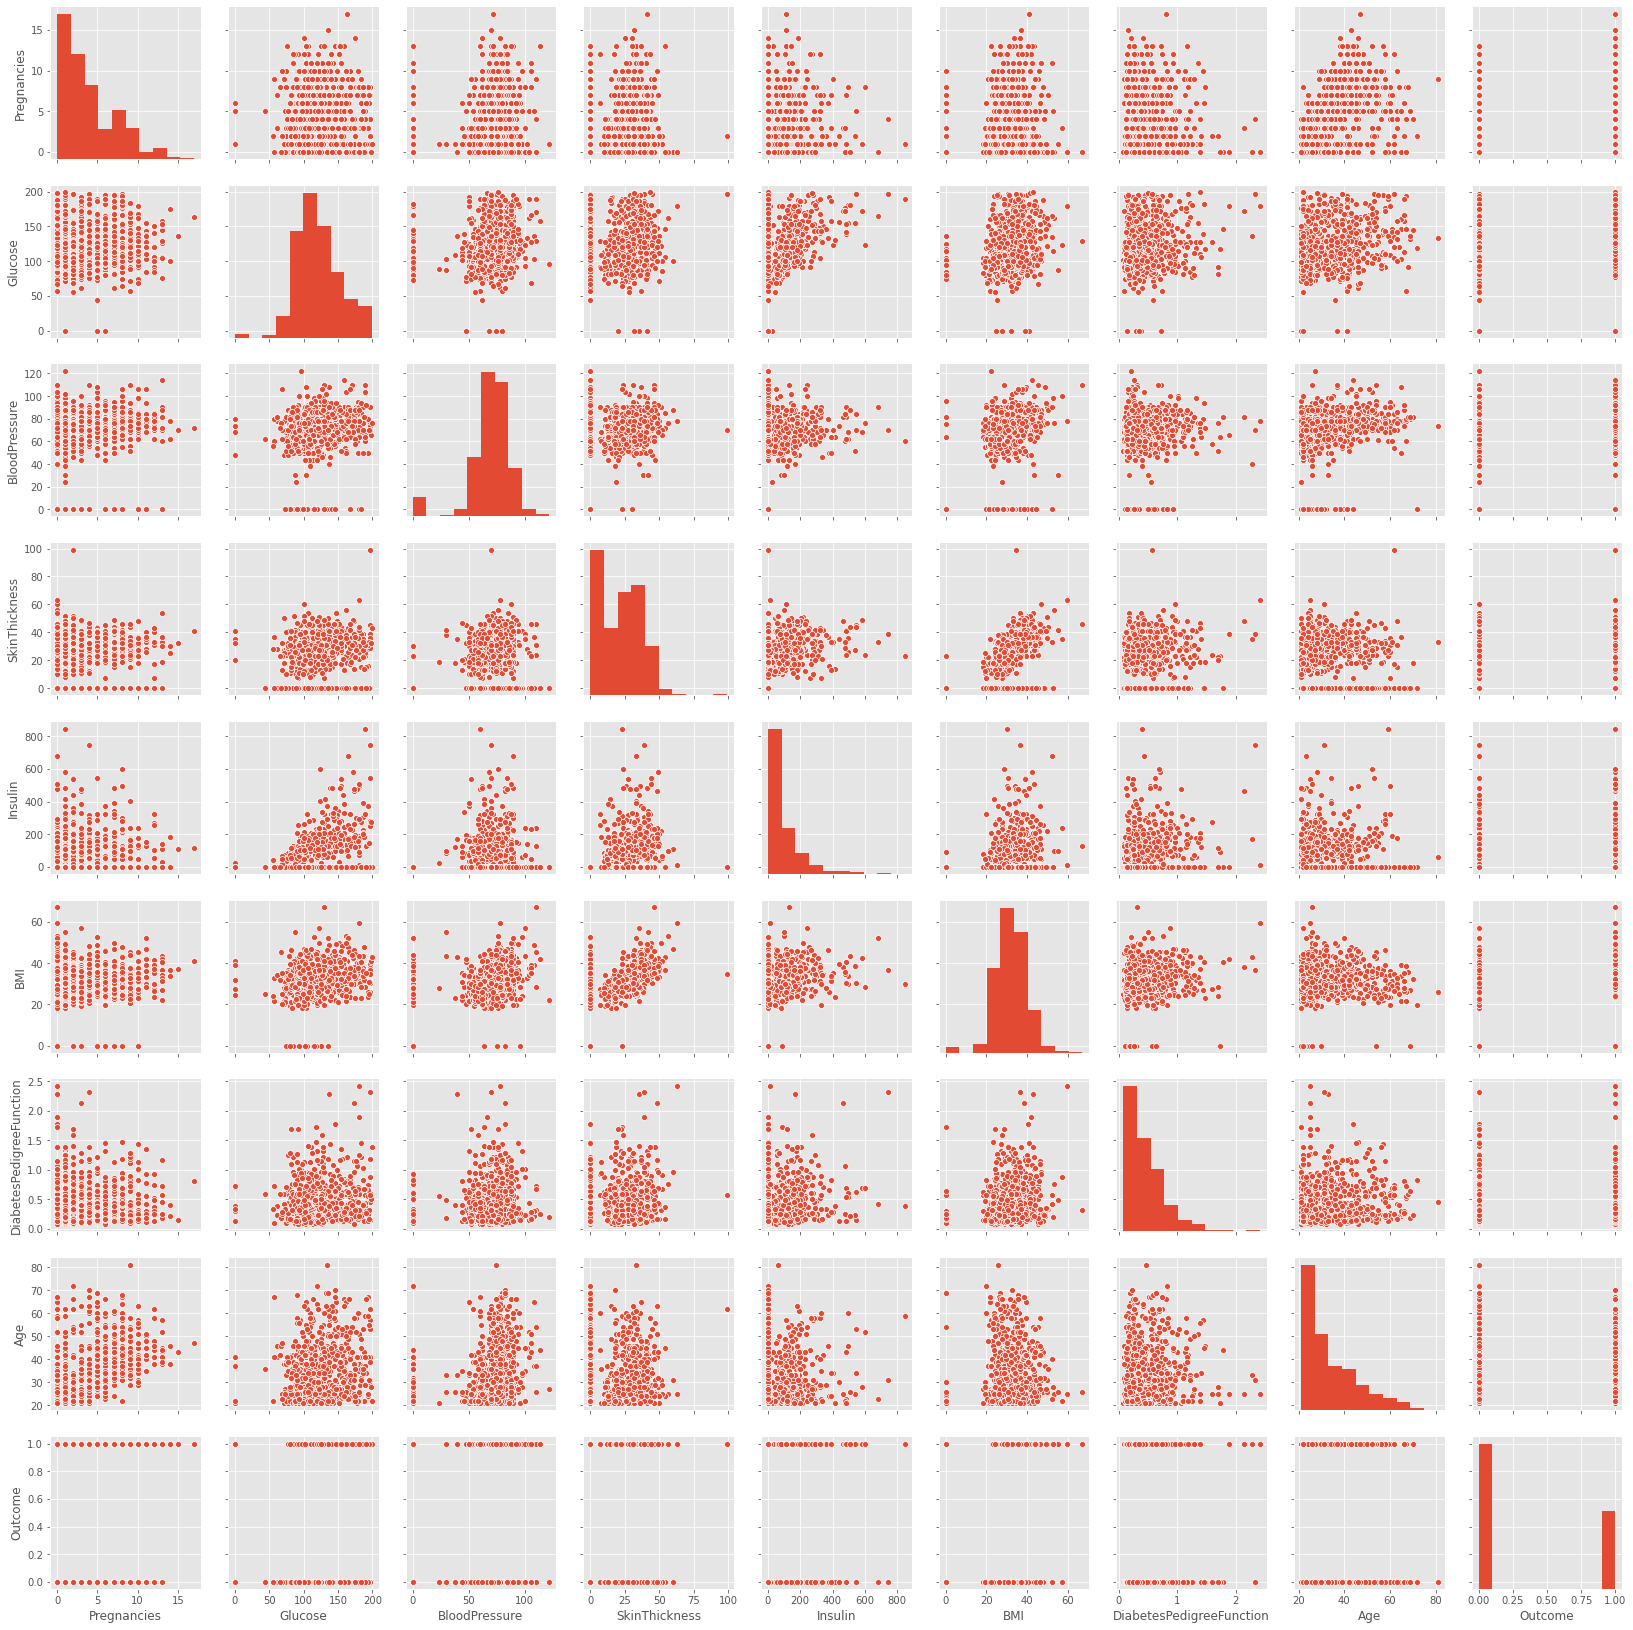

In [13]:
sns.pairplot(data)

In [14]:
# Selecting the dependent(y) and independent(X) feature

X = data.drop(['Outcome'], axis=1)
y = data.iloc[:,-1]       # = data['Outcome']

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Feature Importance - Using ExtraTreeClassifier

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [19]:
print(model.feature_importances_)

[0.11097112 0.23883204 0.09868069 0.0808095  0.07012181 0.13655761
 0.11905266 0.14497456]


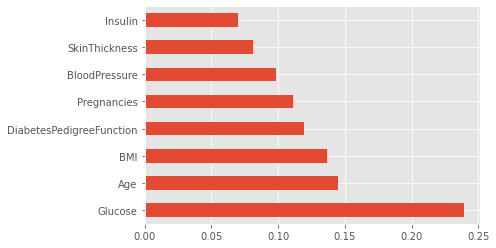

In [20]:
# Plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

By above diagram we can say that SkinThickness and Insulin is the least important features.
Whereas Glucose, BMI and Age are the most important features

### Feature Importance - Using XBClassifier

In [21]:
from xgboost import XGBClassifier, plot_importance

Pregnancies -> 0.10621197
Glucose -> 0.2424023
BloodPressure -> 0.08803366
SkinThickness -> 0.07818192
Insulin -> 0.10381887
BMI -> 0.1486732
DiabetesPedigreeFunction -> 0.10059207
Age -> 0.13208601


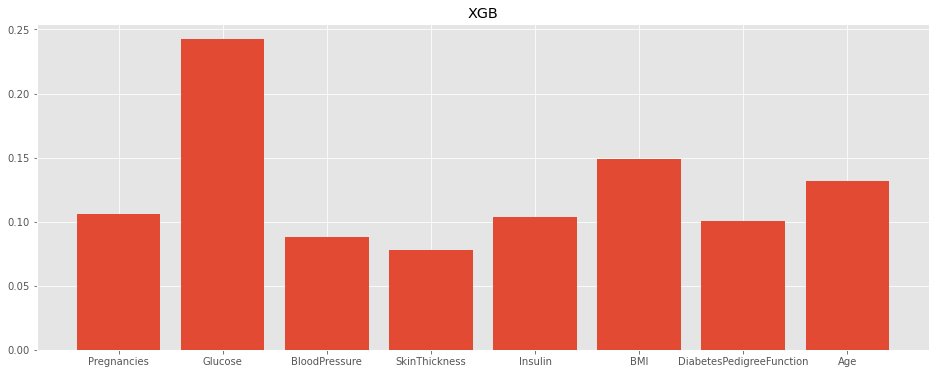

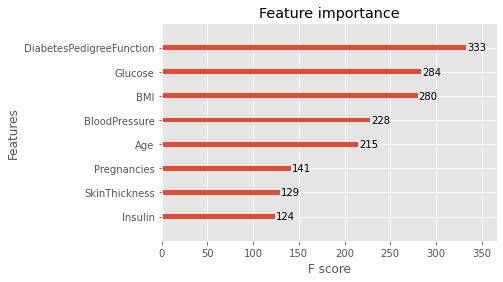

In [22]:
XGBR = XGBClassifier()
XGBR.fit(X,y)
features = XGBR.feature_importances_
Columns = X.columns
for i,j in enumerate(features):
    print(Columns[i],"->",j)

plt.figure(figsize=(16,6))
plt.title(label="XGB")
#plt.bar([x for x in range(len(features))],features)
plt.bar([x for x in (Columns)],features)
plt.show()

plot_importance(XGBR)

## Data Modelling

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [104]:
X_train.shape
X_test.shape
print('Shape of X training data =',X_train.shape)
print('Shape of X test data =',X_test.shape)

Shape of X training data = (614, 8)
Shape of X test data = (154, 8)


In [105]:
print(y_test.value_counts())

# In our test data, Non-Diabetes patients = 100 & Diabetes patients = 54

0    93
1    61
Name: Outcome, dtype: int64


In [106]:
from sklearn.metrics import classification_report , accuracy_score,plot_confusion_matrix

In [107]:
# EVALUATION METRICS Okay, let's define a evaluation function for ease.

def evaluation(y, y_pred):
    print("MSE: {}".format(mean_squared_error(y, y_pred)))
    print("Accuracy Score:", accuracy_score(y, y_pred))
    print("Precision:", precision_score(y, y_pred))
    print("Recall:", recall_score(y, y_pred))
    print("F1 Score:", f1_score(y, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
    cm = pd.crosstab(y, y_pred)
    sns.heatmap(cm, annot=True,xticklabels = ["Non-Diabetic","Diabetic"] , yticklabels = ["Non-Diabetic","Diabetic"], cmap="YlGnBu")
    plt.ylabel('True label',fontsize=12)
    plt.xlabel('Predicted label',fontsize=12)

### Random Forest Algorithm

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Random Forest Report:
MSE: 0.23376623376623376
Accuracy Score: 0.7662337662337663
Precision: 0.711864406779661
Recall: 0.6885245901639344
F1 Score: 0.7
Confusion Matrix:
 [[76 17]
 [19 42]]


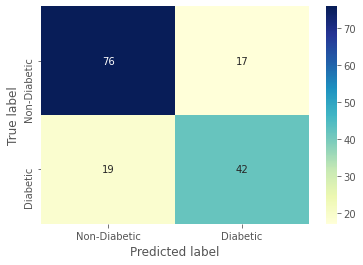

In [109]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Random Forest Report:")
evaluation(y_test,y_pred)

In [129]:
# Test Accuracy

rf.score(X_test,y_test)

0.7662337662337663

In [110]:
from sklearn.model_selection import RandomizedSearchCV

In [111]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [112]:

# Create the random grid 
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid) # RandomizedSearchCV will select the best parameter out of this

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [113]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
random_rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [114]:
best_model = random_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


In [115]:
best_model.best_params_

{'n_estimators': 1100,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 5}

In [116]:
best_model.best_score_

0.7703318672530988

MSE: 0.24675324675324675
Accuracy Score: 0.7532467532467533
Precision: 0.7346938775510204
Recall: 0.5901639344262295
F1 Score: 0.6545454545454545
Confusion Matrix:
 [[80 13]
 [25 36]]


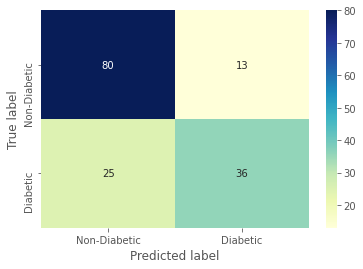

In [117]:
y_pred = best_model.predict(X_test)
evaluation(y_test, y_pred)

### Logistic Regression

Logistic regressin Report:
MSE: 0.22727272727272727
Accuracy Score: 0.7727272727272727
Precision: 0.7708333333333334
Recall: 0.6065573770491803
F1 Score: 0.6788990825688073
Confusion Matrix:
 [[82 11]
 [24 37]]


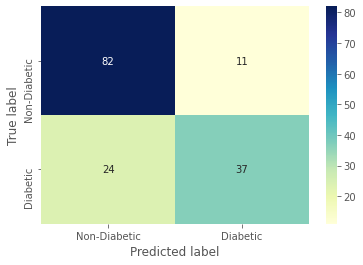

In [118]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
print("Logistic regressin Report:")
evaluation(y_test,y_pred)

### Hyperparameter Tuning - Logistic Regression

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
penalty = ['l1', 'l2']
C = [0.0001,0.001,0.01,0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty, C=C, solver=solver)

grid = GridSearchCV(estimator=lr, param_grid =param_grid,
                    verbose=1, cv=10)

best_model = grid.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    4.2s finished


MSE: 0.22077922077922077
Accuracy Score: 0.7792207792207793
Precision: 0.7755102040816326
Recall: 0.6229508196721312
F1 Score: 0.6909090909090909
Confusion Matrix:
 [[82 11]
 [23 38]]


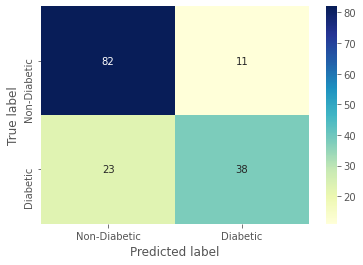

In [121]:
y_pred = best_model.predict(X_test)
evaluation(y_test, y_pred)

### XG Boost Classifier

In [82]:
from xgboost import XGBClassifier, plot_importance

XG Boost Report:
MSE: 0.22077922077922077
Accuracy Score: 0.7792207792207793
Precision: 0.7755102040816326
Recall: 0.6229508196721312
F1 Score: 0.6909090909090909
Confusion Matrix:
 [[82 11]
 [23 38]]


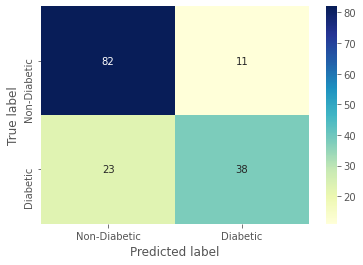

In [122]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.predict(X_test)
print("XG Boost Report:")
evaluation(y_test,y_pred)

### Trying Multiple Models at a time

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))


SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))


RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier(random_state=0)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       113
           1       0.61      0.68      0.64        41

    accuracy                           0.80       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.81      0.80      0.80       154

Voting Ensemble:> 0.7987012987012987
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154

SVM:> 0.8116883116883117
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       115
           1       0.52      0.62      0.56        39

    accuracy                           0.76       154
   macro avg       0.69      0.71      0.70       154
weighted avg